# Осоновы работы на PyTorch

PyTorch - библиотека машинного обучения с открытым исходным кодом для Python. 
PyTorch используется для приложений машинного обучения и глубокие нейронные сети. 
Первоначально PyTorch был разработан исследовательской группой по искусственному интеллекту Facebook.
В оличии от большенства других фреймворков машинного обучения PyTorch совместим с библиотеками numpy и scikit-learn.

Для установки pytorch необходимо зайти на офециальный сайт: https://pytorch.org/
в разделе INSTALL PYTORCH выбрать нужные опции. 

\* Для установки без видеоускорителя (для расчетов на CPU выбрать в разделе CUDA None)

## Импорт torch

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from   torch.autograd import Variable
import torch.nn.functional as F
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt

настроим работу с torch
выбирем формат работы и устройство для работы

In [ ]:
dtype  = torch.float
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# device = torch.device("cuda:0") # Uncomment this to run on GPU

cpu


[]()

Для подробного изучения особенностей pytorch помимо данной работы разработчиками предлагюется
* [начальный мануал с примерами](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html); 
* [статьи с описанием обучающих примеров](https://pytorch.org/tutorials/);
* [репозиторий на GitHub c обучающими примерами](https://github.com/pytorch/examples).

---

## Типы данных


В PyTorch луюбая операция представляет собой граф вычислений. Каждый узел в графе представляет собой одну элементарную операцию.
Пример такого графа представлен на рисунке ниже

![softmax_graph.png](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1520609448/comp_graph_oncyni.png)

Основной тип данных в PyTorch - это тензор. 
Тензор в данном понимании отличается от стандартного, принятого в физике, 
и обозначает многомерную матрицу.

![image_tensor.png](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

таким образом тензорами могут быть скаляры, векторы, матрицы и наборы матриц
в нейронных сетях как правило наборы матриц трех-мерные.

**Скаляр**

In [ ]:
x = torch.tensor(3.)
print(x)
print(x.size(), 'нулевая размерность')

tensor(3.)
torch.Size([]) нулевая размерность


**Вектор**

In [ ]:
temp = torch.FloatTensor([1,2,3.4,-0.3])
temp.size()
print(temp)
print(temp.size())

tensor([ 1.0000,  2.0000,  3.4000, -0.3000])
torch.Size([4])


**Матрица**

попробуем задать из numpy

In [ ]:
temp = torch.from_numpy(np.eye(4))
print(temp)
print(temp.size())

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64)
torch.Size([4, 4])


c матрицами и векторами в torch можно работать также как и в numpy

In [ ]:
temp = temp[:2,:3]
print(temp)
print(temp.size())

tensor([[1., 0., 0.],
        [0., 1., 0.]], dtype=torch.float64)
torch.Size([2, 3])


**Тензор**

In [ ]:
import torch
x = torch.Tensor(2, 3)
print(x)
print(x.shape)

tensor([[0.0000e+00, 1.8750e+00, 8.4078e-45],
        [0.0000e+00, 1.4013e-45, 0.0000e+00]])
torch.Size([2, 3])


**Случайные тензор**

In [ ]:
x = torch.rand(2, 3)
print(x)

x = torch.rand(2, 3,2)
print(x)
print(x.shape,'трех-мерный тензор')

tensor([[0.0812, 0.6494, 0.3877],
        [0.4282, 0.8209, 0.3250]])
tensor([[[0.6844, 0.3428],
         [0.8327, 0.2470],
         [0.1784, 0.4802]],

        [[0.6151, 0.3245],
         [0.9564, 0.5970],
         [0.0632, 0.7664]]])
torch.Size([2, 3, 2]) трех-мерный тензор


**Примеры операций с тензорами**

C тензорами можно производить большенство стандартных операций, имеющихся в пакете NumPy

In [ ]:
x = torch.ones(2,3)
y = torch.ones(2,3) * 2
с = torch.ones(2,3) * 0.1
z = x + y*с
print(z)


tensor([[1.2000, 1.2000, 1.2000],
        [1.2000, 1.2000, 1.2000]])


In [ ]:
a = y[:,:1] + 1
print(a)

tensor([[3.],
        [3.]])


In [ ]:
s = torch.sum(a)
print(s)

tensor(6.)


In [ ]:
s = torch.pow(a,2)
print(s)


tensor([[9.],
        [9.]])


In [ ]:
x = torch.randn(2, 3)
print(x)
s = torch.transpose(x,0,1)
print(s)

tensor([[-0.3215, -0.7384,  1.2512],
        [ 0.3673, -1.1259,  0.2302]])
tensor([[-0.3215,  0.3673],
        [-0.7384, -1.1259],
        [ 1.2512,  0.2302]])


In [ ]:
t = torch.tensor([1., 2.])
torch.save(t, 'tensor4test.pt')

del(t)

try:
    print(t)
except:
    print('now tensor does not exist')
    
t_new = torch.load('tensor4test.pt')
print('new t:',t_new)

now tensor does not exist
new t: tensor([1., 2.])


**Переменные в PyTorch**

В библиотеке PyTorch имеется ряд встроенных функций, которые могут быть автотмаически 
вызваны в коде. Одной из основных такхи функций является автоматизированный градиент.
Данный механизм особенно важен при обучении нейронных сетей методом обратного распространения ошибки.
Для осуществления автоматизированной работы со встроенными функциями в PyTorch используется тип данных
переменные. 

Создадим переменную из простого тензора, для которой необходим градиент (она может быть использована для обучения):

In [ ]:
x = Variable(torch.ones(2, 2) * 2, requires_grad=True)
print(x)

tensor([[2., 2.],
        [2., 2.]], requires_grad=True)


Тензор тоже может быть переменным.

In [ ]:
x = torch.tensor([3.,4.])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)
print(x,y,b)

tensor([3., 4.]) tensor([[2., 2., 2.],
        [2., 2., 2.]]) tensor(5., requires_grad=True)


c переменными можно выполнять теже действия, что и с тензорами

In [ ]:
y = w * x + b
print(y)

tensor([17., 37.], grad_fn=<AddBackward0>)


Однако, с переменными можно задать и специфическую операцию - получение градиента  

! обратите внимание, что обратное распростронение ошибки работает только для скаляра! 

In [ ]:
y = w * x + b
dy = torch.sum(y).backward()


In [ ]:
print(''' sum of dy/dw:''', w.grad)
print('sum of dy/db:', b.grad)

 sum of dy/dw: tensor([3., 4.])
sum of dy/db: tensor(2.)


Сравнение работы PyTorch c градиентом и numpy можно проиллюстрировать следуюим образом

![NP_vs_Torch](http://img.shangdixinxi.com/up/info/202001/20200103000701945215.png)

Как видно из иллюстрации, показанной выше, PyTorch собирает все этапы вычислений в единый граф.
Данный граф формируется динамически для каждой сессии. 
Работу данного графа можно проиллюстрировать следующим образом для расчет функции потерь


![torch_graph](https://miro.medium.com/max/700/1*K2QnR_TRF9XfqNgNGDRqng.png)

Когда граф построен, он может быть выполнен или на CPU или на GPU Nvidia (c использованием фреймворка cuda).

---

### Встроенные функции активации в PyTorch

In [ ]:
data = torch.randn(2, 2)
print(data)
print(torch.relu(data))

tensor([[ 0.1839,  1.3977],
        [ 1.6328, -2.4620]])
tensor([[0.1839, 1.3977],
        [1.6328, 0.0000]])


In [ ]:
data = torch.randn(2, 2)
print(data)
print(torch.sigmoid(data))

tensor([[ 0.7384, -0.5754],
        [ 1.0508,  0.4036]])
tensor([[0.6766, 0.3600],
        [0.7409, 0.5996]])


In [ ]:
data = torch.randn(2, 2)
print(data)
print(torch.tanh(data))

tensor([[-0.4817,  0.3761],
        [-0.1944,  0.1433]])
tensor([[-0.4476,  0.3593],
        [-0.1919,  0.1424]])


### Встроенные слои в PyTorch

In [ ]:
# Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

lin = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(2, 5)
print(lin(data)) 
print(lin(data).size()) 

tensor([[-0.5038, -0.5178,  0.3489],
        [ 0.1732, -1.0476, -0.0381]], grad_fn=<AddmmBackward>)
torch.Size([2, 3])


In [ ]:
# Applies a 1D convolution over an input signal composed of several input planes.

lin = nn.Conv1d(in_channels  = 5,
                out_channels = 3,
                kernel_size  = 2,
                stride       = 1,
                padding_mode = 'zeros',)  
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(1, 5, 2)
print(lin(data)) 
print(lin(data).size()) 

tensor([[[-0.0428],
         [-0.0871],
         [ 0.4935]]], grad_fn=<SqueezeBackward1>)
torch.Size([1, 3, 1])


In [ ]:
# Applies a 1D max pooling over an input signal composed of several input planes.

lin = nn.MaxPool1d(kernel_size = 2,
                   stride      = 1)  
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(1, 5, 2)
print(lin(data)) 
print(lin(data).size()) 

tensor([[[-0.6559],
         [ 1.5549],
         [ 0.1622],
         [-0.6880],
         [ 0.1080]]])
torch.Size([1, 5, 1])


In [ ]:
# Applies a 2D convolution over an input signal composed of several input planes.

lin = nn.Conv2d(in_channels  = 5,
                out_channels = 3,
                kernel_size  = 2,
                stride       = 1,
                padding_mode = 'zeros',)  

data = torch.randn(1, 5, 4, 2)
print(lin(data)) 
print(lin(data).size()) 

tensor([[[[-0.1818],
          [-0.2898],
          [ 0.6576]],

         [[ 0.6750],
          [-1.0868],
          [-0.7502]],

         [[-0.3926],
          [-0.7923],
          [ 0.0696]]]], grad_fn=<ThnnConv2DBackward>)
torch.Size([1, 3, 3, 1])


In [ ]:
# Applies a multi-layer Elman RNN with :math:`tanh` or :math:`ReLU` non-linearity to an input sequence.

rnn  = nn.RNN(3, 2, 2) 
data = torch.randn(3, 2, 3)
h0   = torch.randn(2, 2, 2)
c0   = torch.randn(2, 2, 2)
output, hn = rnn(data, h0)
print(output) 
print(output.size())

tensor([[[-0.9743, -0.3390],
         [-0.6847, -0.3865]],

        [[-0.6346,  0.3954],
         [-0.4316, -0.0528]],

        [[-0.7212, -0.0350],
         [-0.9085,  0.6949]]], grad_fn=<StackBackward>)
torch.Size([3, 2, 2])


In [ ]:
# Applies a multi-layer long short-term memory (LSTM) RNN to an input sequence.

rnn  = nn.LSTM(3, 2, 2) 
data = torch.randn(2, 2, 3)
h0   = torch.randn(2, 2, 2)
c0   = torch.randn(2, 2, 2)
output, (hn, cn) = rnn(data, (h0, c0))
print(output) 
print(output.size()) 

tensor([[[ 0.3315, -0.1456],
         [ 0.1554,  0.0448]],

        [[ 0.0270,  0.0837],
         [-0.0015,  0.1473]]], grad_fn=<StackBackward>)
torch.Size([2, 2, 2])


---

## Линейная регрессия на PyTorch

Выражение для регресси 

$y=а\cdotх+b$

где:
* Значение $а$ является наклоном.
* Значение $b$ — это $y$ — пересечение.
* $r$ — коэффициент корреляции.
* $r^2$— коэффициент корреляции.

В более общем - матричном виде

$ y =  X \cdot W^T + b$

где:
* X - это скаляр/матрица/тензор входных значений;
* W - это скаляр/матрица/тензор весов (в случае скаляра W = a);
* b - это скаляр/вектор/матрица смещений (на размер меньше, чем W);
* y - это скаляр/матрица/тензор выходных значений.

Отметим, что часто набор $W$ включает в себя b в качестве нулевой или последней составляющей.

![lineRegression](https://coderlessons.com/wp-content/uploads/2019/07/interpreting_result-1.jpg)

## Реализуем регрессию в pyTorch в ручном режиме

импорт основных библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torch.nn as nn
from torch.autograd import Variable
%matplotlib inline

torch.manual_seed(1969)

# import seaborn as sns
# import pandas as pd
# sns.set_style(style = 'whitegrid')
# plt.rcParams["patch.force_edgecolor"] = True

создадим датасет

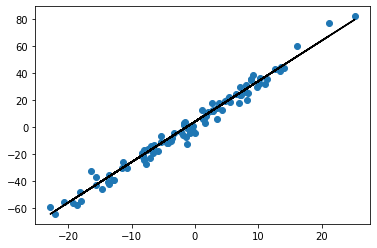

In [ ]:
x = torch.randn(100, 1) * 10
y_clear = 3*x + 4
y = y_clear + 5 * torch.randn(100, 1)

plt.plot(x,y,'o')
plt.plot(x,y_clear,'-k')

In [ ]:
# x = np.atleast_2d(x)
# y = np.atleast_2d(y)

In [ ]:
# inputs  = torch.from_numpy(x)
# targets = torch.from_numpy(y)
inputs = x
targets = y
print(inputs.shape)

torch.Size([100, 1])


зададим веса и смещения случайными тензорами

In [ ]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

tensor([0.7502], requires_grad=True)
tensor([-0.4575], requires_grad=True)


Определим модель линейной регрессии

In [ ]:
def model(x,w,b):
    return x * w + b

Зададим функцию потерь

$ MSE = \sum (y-x)^2 / N$

In [ ]:
def mse(predicts, targets):
    diff = torch.abs(predicts - targets)
    return torch.sum(diff * diff) / diff.numel()

Посмотрим на начальные значения предсказаний и сравним их с ожидаемыми значениями путем подчета функции потерь (MSE)

In [ ]:
predicts = model(inputs,w,b)
# print(predicts)

loss = mse(predicts, targets)
print('loss = ',loss.data.numpy())


loss =  515.2697


Пока значение функции потерь большое модель будет давать большую ошибку предсказания

Для снижения функции потерь будем использовать метод градиентного спукска.

Посчитаем один шаг такого градиента

In [ ]:
predicts = model(inputs,w,b)
loss = mse(predicts, targets)
loss.backward()
db = b.grad
dw = w.grad


Теперь попробуем обновить веса и сброситьградиент

In [ ]:
LR = 0.01

# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * LR
    b -= b.grad * LR
    w.grad.zero_()
    b.grad.zero_()



Проведем данную процедуру иттеративно, например 100 эпох

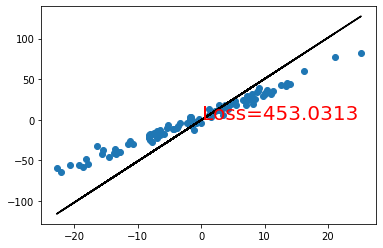

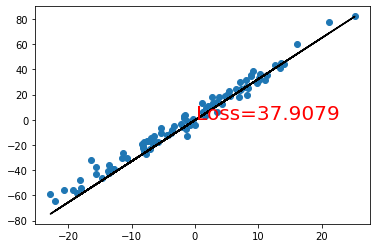

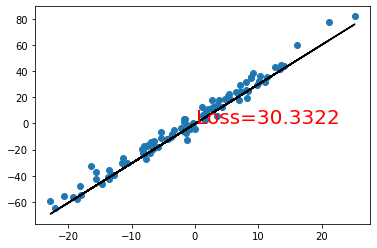

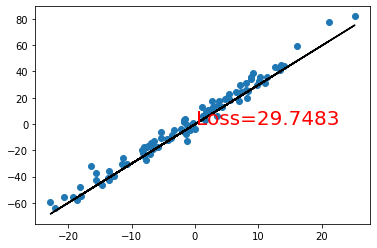

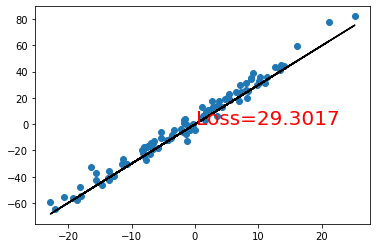

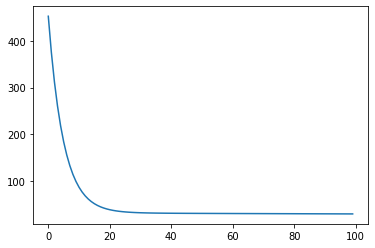

In [ ]:
epochs = 100
LR = 0.0005 

trainig = np.zeros(epochs)
for i in range(epochs):
    predicts = model(inputs,w,b)
    loss = mse(predicts, targets)
    trainig[i] = loss.data.numpy()
    loss.backward()
    with torch.no_grad():
        w -= w.grad * LR
        b -= b.grad * LR
        w.grad.zero_()
        b.grad.zero_()

    if(i%20 == 0):
        plt.plot(x,targets.data.numpy(),'o')
        plt.plot(x,predicts.data.numpy(),'-k')
        plt.text(0.1, 0.1, 'Loss=%.4f' %(trainig[i]), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        
plt.plot(trainig)

Посчитаем, что получилось.

In [ ]:
predicts = model(inputs,w,b)
loss = mse(predicts, targets)
print(loss)


tensor(28.8742, grad_fn=<DivBackward0>)


Полученные значения веса (наклон) и смещения

In [ ]:
print(w)
print(b)

tensor([2.9912], requires_grad=True)
tensor([-0.0708], requires_grad=True)


**результат**

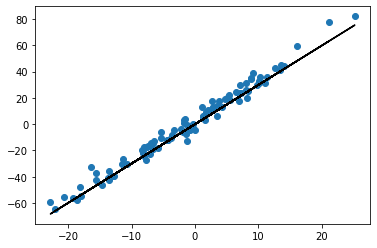

In [ ]:
plt.plot(x,targets.data.numpy(),'o')
plt.plot(x,predicts.data.numpy(),'-k')

##### Упражнение 1

реализуйте квадратичную регрессию 

$y = w_1\cdot x^2 + w_2\cdot x + b = w_1\cdot x_1 + w_2\cdot x_2 + b$

## Реализуем регрессию в PyTorch при помощи встроенных методов

теперь сделаем регрессию в более поплуярном в PyTorch виде

Для этого запишем класс линейная регрессия.

!В PyTorch каждый класс модели желательно, чтобы наследовал от базового класса nn.Module!

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, in_features=1, out_features=1 ):
        super().__init__()
        self.l1 = nn.Linear(in_features=in_features, out_features=out_features)
    def forward(self, x):
        return self.l1(x)
    


Создадим модель - экземпляр нашего класса

In [ ]:
model = LinearRegression(1,1)
model

LinearRegression(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)

Теперь выберем стандартную функцию потерь и оптимизатор (метод градиентного спуска)

In [ ]:
LR = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

w,b   = model.parameters()
print(w,b)

Parameter containing:
tensor([[-0.7876]], requires_grad=True) Parameter containing:
tensor([0.6797], requires_grad=True)


In [ ]:
plt.plot(x,y,'o')
plt.plot(x,y_clear,'-k')
#Предыдущие данные

NameError: name 'x' is not defined

Проведем обучение сети

Epoch:  1  Loss:  605.1109619140625
Epoch:  21  Loss:  62.147361755371094
Epoch:  41  Loss:  23.663070678710938
Epoch:  61  Loss:  19.759572982788086
Epoch:  81  Loss:  18.87649917602539


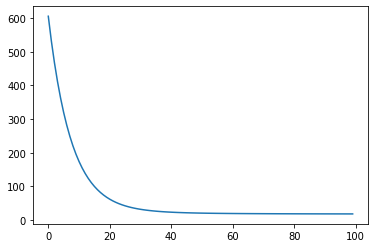

In [ ]:
epochs = 100
losses = np.zeros(epochs)

for i in range(epochs):
    predict = model.forward(x)
    
    loss = criterion(predict, y)

    losses[i] = loss.data.numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//20 == i/20):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

In [ ]:
[w, b]    = model.parameters()
print(w[0,0],b[0])


tensor(3.0209, grad_fn=<SelectBackward>) tensor(2.6837, grad_fn=<SelectBackward>)


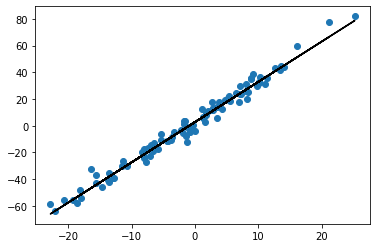

In [ ]:
predict = model.forward(x)
plt.plot(x,y.data.numpy(),'o')
plt.plot(x,predict.data.numpy(),'-k')

**Посмотрим на то, какие данные из модели можно получать. Для этого есть несколько способов**

In [ ]:
print(list(model.parameters()))
print(list(model.state_dict()))
print(list(model.named_buffers()))
print(list(model.named_parameters()))

[Parameter containing:
tensor([[3.0209]], requires_grad=True), Parameter containing:
tensor([2.6837], requires_grad=True)]
['l1.weight', 'l1.bias']
[]
[('l1.weight', Parameter containing:
tensor([[3.0209]], requires_grad=True)), ('l1.bias', Parameter containing:
tensor([2.6837], requires_grad=True))]


In [ ]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of trainable parameters for the model: %d' % (num_params))

num_params = sum(p.numel() for p in model.parameters() )
print('Number of all parameters for the model: %d' % (num_params))

Number of trainable parameters for the model: 2
Number of all parameters for the model: 2


Также для оценки модели есть специальная функция ```summary``` из библиотеки ```torchsummary```

In [ ]:
summary(model,input_size = x.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


теперь попробуем сохранить модель

In [ ]:
torch.save(model.state_dict(), 'test_module.pt')

удалим модель

In [ ]:
del(model)

теперь заново загруим модель, но назовем ее ```new_model```

In [ ]:
new_state_dict = torch.load('test_module.pt')
new_model = LinearRegression(1,1)
new_model.load_state_dict(new_state_dict)

<All keys matched successfully>

проверим, что новая модель соответствует обученной прежде

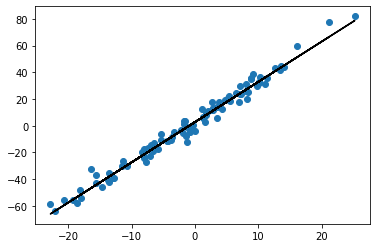

In [ ]:
predict = new_model.forward(x)
plt.plot(x,y.data.numpy(),'o')
plt.plot(x,predict.data.numpy(),'-k')

Также модель можно сохранить с использованием JIT скрипотов, что полезно для ее последующего портирования, например на С++

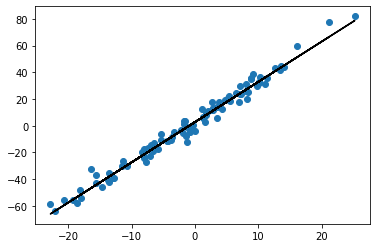

In [ ]:
scripted_module = torch.jit.script(new_model)
torch.jit.save(scripted_module, 'mymodule.pt')
again_new_model = torch.jit.load('mymodule.pt')

predict = again_new_model.forward(x)
plt.plot(x,y.data.numpy(),'o')
plt.plot(x,predict.data.numpy(),'-k')

Смотрите больше примеров работы с моделями [тут](https://pytorch.org/docs/stable/notes/serialization.html).

#### Упражнение 1

реализуйте квадратичную регрессию в при помощи встроенных методов PyTorch

#### Упражнение 2

В место вручную описанного класс LinearRegression можно 
использовать стандрартные шаблоны для создания нейронных сетей.

Одним из таких шаблонов является `Sequential` 

вместе с данным шаблоном модель можно переписать в следующем виде


```python 
model = nn.Sequential(nn.Linear(n_inputs, n_outputs)) 
```


Задание: Перепешите Описанный выше пример с использованием шаблона `Sequential` 


---

## Логистическая регрессия на PyTorch

**Создадаим датасет ирисов с двумя классами, входные данные сделаем дву-мерными**

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection  import train_test_split

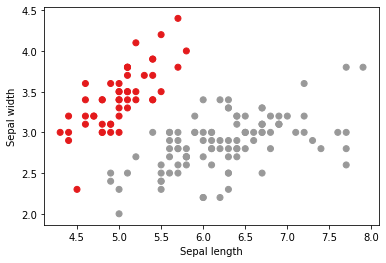

In [ ]:
iris = datasets.load_iris()

x = iris.data[:, :2]
y = (iris.target != 0) 

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

**выделим тренировочную и тестовую части**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([105, 2]) torch.Size([45, 2]) torch.Size([105, 1]) torch.Size([45, 1])


**создадим класс регрессора, аналогично, как в случае линейной регрессии**

In [ ]:
class LogisticRegression(nn.Module):
    
    def __init__(self, in_features=2, n_classes=1 ):
        super().__init__()
        self.l1 = nn.Linear(in_features=in_features, out_features=n_classes)
    def forward(self, x):
        return torch.sigmoid(self.l1(x))



**опишим параметры обучения**

* **Будем использовать в качестве функции потерь бинарную энтрпию**
* **Обучение проведем при помощи стохастического градиентного спуска**

In [ ]:
LR = 0.1

model = LogisticRegression(x_train.shape[1],y_train.shape[1])

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

w,b   = model.parameters()
print(w,b)

summary(model,input_size = x.shape[1:])

Parameter containing:
tensor([[0.3340, 0.3726]], requires_grad=True) Parameter containing:
tensor([0.3685], requires_grad=True)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


**Проведем процесс тренировки регрессора**

Epoch:  1  Loss:  0.6525978446006775
Epoch:  21  Loss:  0.520682692527771
Epoch:  41  Loss:  0.4516817033290863
Epoch:  61  Loss:  0.3987092971801758
Epoch:  81  Loss:  0.35733699798583984


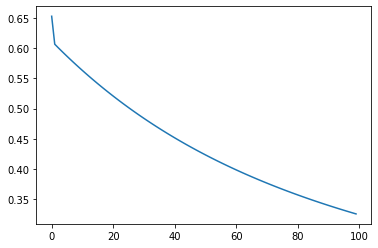

In [ ]:
epochs = 100
losses = np.zeros(epochs)

for i in range(epochs):
    predict = model.forward(x_train)
    
    loss = criterion(predict, y_train)

    losses[i] = loss.data.numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//20 == i/20):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

**Посмотрим на ошибку**

In [ ]:
predict = model.forward(x_test)

In [ ]:
print(torch.mean(torch.round(predict)-torch.round(y_test)).data)

tensor(0.0222)


**Попытаемся ее визуализировать и сравнить ожидаемые значения ('Ground Truth') и полученные ('Predicted')**

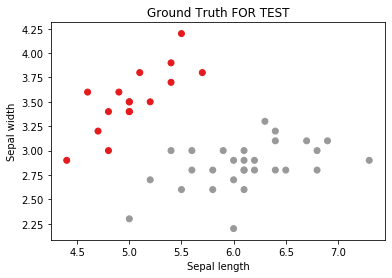

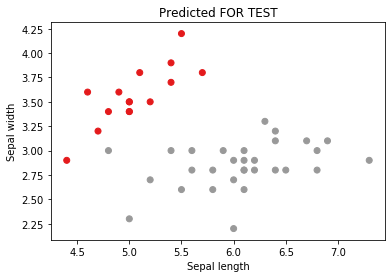

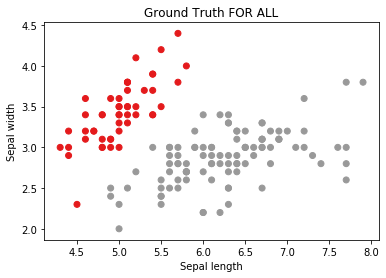

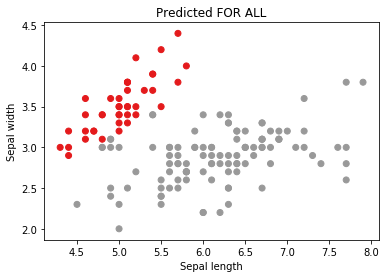

In [ ]:

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=torch.squeeze(y_test), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')
plt.show()


predict = model.forward(x_test)

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR TEST')
plt.show()

predict = model.forward(torch.from_numpy(x.astype(np.float32)))

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(y)), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR ALL')
plt.show()

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR ALL')
plt.show()

#### Упражнение 1
проверьте как на качество обучение повлияет снижение скорости обучения, как увеличение повлияет снижение эпох обучения

#### Упражнение 2
Перепишите модель с использованием шаблона 
```python 
Sequential
```



<details>
<summary>Click here for hint</summary>

```python 
    
    model = nn.Sequential(
        nn.Linear(in_features=x_train.shape[1], out_features=1), 
        nn.Sigmoid()    )    
    
```

</details>

---

## **Много-классовая логистическая регрессия**

Рассмотрим особенности замены бинарной логистической регрессии на много-классовую (Софт-макс) регрессию

Датасет из 3 классов

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

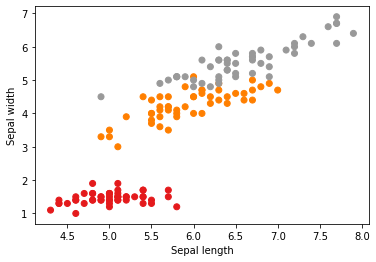

(150, 2)
(150,)
torch.Size([105, 2]) torch.Size([45, 2]) torch.Size([105, 1]) torch.Size([45, 1])


In [ ]:
iris = datasets.load_iris()

x = iris.data[:,[0,2] ]
y = (iris.target) 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# standardize
x[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

print(x.shape)
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

**Класс для регрессии**

In [ ]:
class SoftmaxRegression(LogisticRegression):    
    
    def __init__(self, 
                 in_features = 2, 
                 n_classes   = 3):
        
        super().__init__(in_features = in_features, 
                         n_classes   = n_classes)
    
    def forward(self, x):
        return torch.nn.functional.softmax(self.l1(x), dim=1)

**Обучение при помощи функции Взаимной энтропии**

In [ ]:
LR = 0.1

model = SoftmaxRegression(x_train.shape[1],3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

w,b   = model.parameters()
print(w,b)
summary(model,input_size = x.shape[1:])

Parameter containing:
tensor([[-0.4953, -0.4105],
        [-0.2640,  0.0957],
        [-0.4164,  0.1461]], requires_grad=True) Parameter containing:
tensor([-0.2691, -0.0484, -0.2824], requires_grad=True)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 3]               9
Total params: 9
Trainable params: 9
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


**Процесс обучения**

Epoch:  1  Loss:  1.2328581809997559
Epoch:  81  Loss:  0.8841432332992554
Epoch:  161  Loss:  0.8274716138839722
Epoch:  241  Loss:  0.8089736700057983
Epoch:  321  Loss:  0.7952234148979187


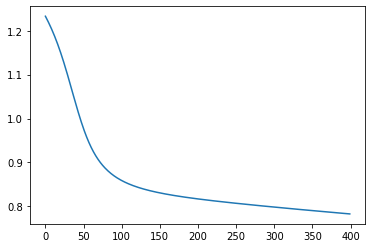

In [ ]:
epochs = 400
losses = np.zeros(epochs)

for i in range(epochs):

    predict = model.forward(x_train)

    loss = criterion(predict, torch.squeeze(y_train).type(torch.long))

    losses[i] = loss.data.numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//(epochs//5) == i/(epochs//5)):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

**В результате функция предсказания выдает 3 класса в виде массива**

torch.Size([150, 3])


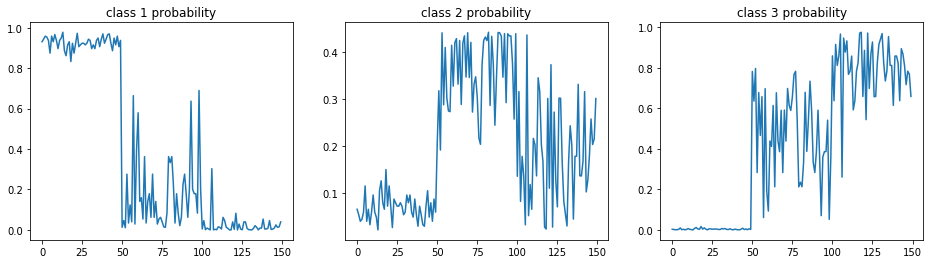

In [ ]:
predict = model.forward(torch.from_numpy(x).type(torch.float))
print(predict.shape)
plt.figure(figsize = (16,4))
plt.subplot(1,3,1);plt.plot(predict.data.numpy()[:,0]);plt.title('class 1 probability')
plt.subplot(1,3,2);plt.plot(predict.data.numpy()[:,1]);plt.title('class 2 probability')
plt.subplot(1,3,3);plt.plot(predict.data.numpy()[:,2]);plt.title('class 3 probability')
plt.show()

**Приведем их к одному вектору**

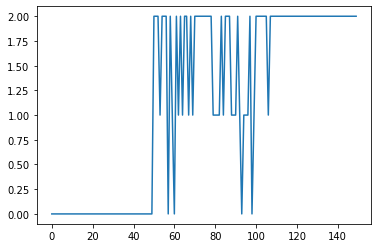

In [ ]:
lables_predicted = predict.data.numpy().argmax(axis=1)
lables_predicted.shape
plt.plot(lables_predicted)

**Визуализация**

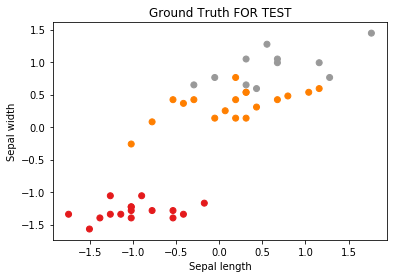

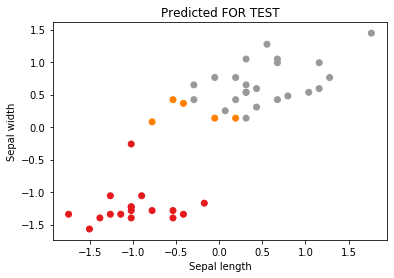

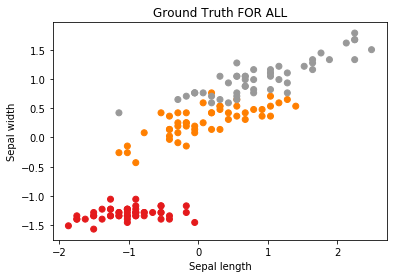

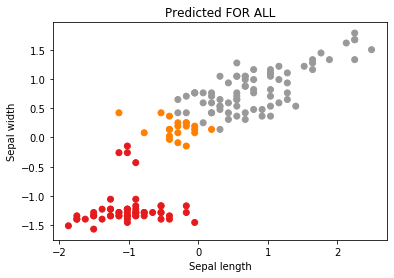

In [ ]:
# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=torch.squeeze(y_test), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')
plt.show()


predict = model.forward(x_test)
lables_predicted = predict.data.numpy().argmax(axis=1)

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=lables_predicted, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR TEST')
plt.show()

predict = model.forward(torch.from_numpy(x.astype(np.float32)))
lables_predicted = predict.data.numpy().argmax(axis=1)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(y)), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR ALL')
plt.show()

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=lables_predicted, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR ALL')
plt.show()

#### Упражнение 1
Проверьте как на качество обучение повлияет снижение скорости обучения, как увеличение повлияет снижение эпох обучения

#### Упражнение 2
Перепишите модель с использованием шаблона 
```python 
Sequential
```



<details>
<summary>Click here for hint</summary>

```python 
    
model = nn.Sequential(
    nn.Linear(in_features=x_train.shape[1], out_features=3), 
    nn.Softmax())
    
```

---

## Полносвязная нейронная сесть на PyTorch

Создадим полносвязную нейронную сеть с одним скрытым слоем следующего вида

![MLP](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSy34_CeT3sV3jpkCm7GqZWSqfbdapSUaAQ2A&usqp=CAU)

Сеть будем обучать для датасета, аналогичного тому, который мы использовали прежде, но теперь добавим к нему шумы.

In [ ]:
from sklearn import datasets
from sklearn.model_selection  import train_test_split

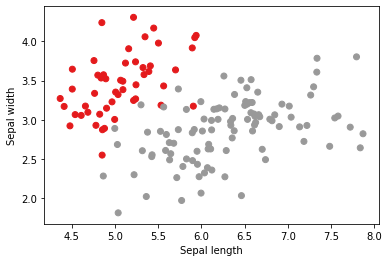

torch.Size([105, 2]) torch.Size([45, 2]) torch.Size([105, 1]) torch.Size([45, 1])


In [ ]:
STD = 0.2 #уровень шума

iris = datasets.load_iris()

x  = iris.data[:, :2] 
x += np.random.randn(x.shape[0],x.shape[1])*STD
y  = (iris.target != 0) 

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

**Опишем нейронную сеть c одним скрытым слоем**

In [ ]:
class FeedForward(torch.nn.Module):
        
    def __init__(self, input_size, hidden_size, n_classes = 1):

        super(FeedForward, self).__init__()

        self.fc1  = torch.nn.Linear(input_size, hidden_size)
        
        self.relu = torch.nn.ReLU()
        
        self.fc2  = torch.nn.Linear(hidden_size, n_classes)

        if(n_classes ==1):
            self.to_classes = torch.nn.Sigmoid()
        
        else:
            self.to_classes = torch.nn.Softmax()

    def forward(self, x):
        hidden = self.fc1(x)
        relu   = self.relu(hidden)
        output = self.fc2(relu)
        output = self.to_classes(output)            
        return output


**создадаим экземпляр нейронной сети и функцию потерь, обучать будем при помощи адаптивного метода Adam**

In [ ]:
HIDDEN = 10
LR    = 0.1

model = FeedForward(x.shape[1], HIDDEN, n_classes = np.max(y))

# FOR BINARY CASE
if np.max(y) ==1:
    criterion = torch.nn.BCELoss()
else:
    criterion = torch.nn.CrossEntropyLoss()
    
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

summary(model,input_size = x.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]              30
              ReLU-2                   [-1, 10]               0
            Linear-3                    [-1, 1]              11
           Sigmoid-4                    [-1, 1]               0
Total params: 41
Trainable params: 41
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


**Обучение**

Epoch:  1  Loss:  0.9730971455574036
Epoch:  301  Loss:  0.08249572664499283
Epoch:  601  Loss:  0.08249553292989731
Epoch:  901  Loss:  0.08250050246715546
Epoch:  1201  Loss:  0.08249553292989731


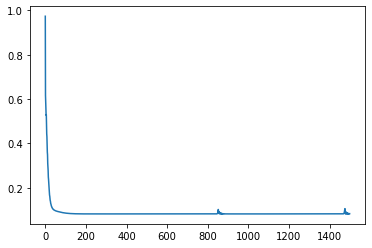

In [ ]:
model.train()
epochs = 1500
losses = np.zeros(epochs)

for i in range(epochs):

    predict = model.forward(x_train)

    loss = criterion(predict.squeeze(), y_train.squeeze())

    losses[i] = loss.data.numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//(epochs//5) == i/(epochs//5)):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

**Проверка**

In [ ]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test.squeeze()) 
print('Test loss after Training' , after_train.item())

Test loss after Training 0.13388068974018097


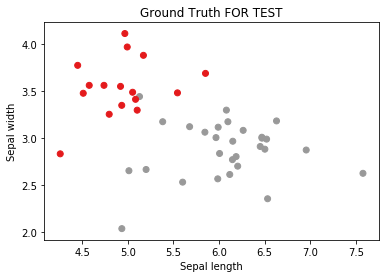

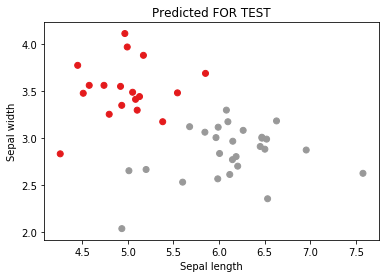

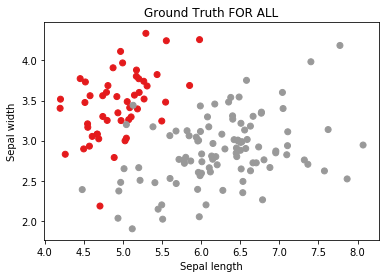

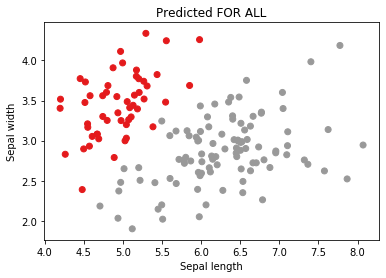

In [ ]:
model.eval()

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=torch.squeeze(y_test), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')
plt.show()

predict = model.forward(x_test)

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR TEST')
plt.show()

predict = model.forward(torch.from_numpy(x.astype(np.float32)))

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(y)), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR ALL')
plt.show()

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR ALL')
plt.show()

#### Упражнение 1
* Проверьте, как величина шума будет сказываться на точности работы нейронной сети.
* Проверьте, как при этом увеличение числа скрытых слоев или числа перцепторонов в скрытом слое скажется на результате.
* Проверьте, как изменение функции активации скажется на результате.
* Добавьте к архитектуре сети дропауты ```self.dropout = torch.nn.Dropout(p=PROBABILITY, inplace=False)```, изучитие особенности обучения нейронной сети в зависимости от вероятности дроп-аута и его места в архитектуре сети.

#### Упражнение 2
Обучите сеть заново при помощи стохастического градиентного спуска и сравните результаты обучения для использованного ```Adam``` и классического метода ```SGD```

#### Упражнение 3
Создайте сеть для 3-х классов и проверьте ее работу на датасете, использованном в разделе софт-макс регрессия.

#### Упражнение 4
перепишите модель в формате ```Sequential```

* * *

## Валидация и обучение на минибатчах для полносвязной сети

Вероятно, что запланнированная выше процедура обучения избыточна, это может привести к переобучению сети.

Для контроля оптимального этапа (оптимальной эпохи) обучения введвем валидацию обучения.

**Выделим в датасете 3 части.**

In [ ]:
from sklearn import datasets
from sklearn.model_selection  import train_test_split

STD = 0.4 #уровень шума

iris = datasets.load_iris()

x  = iris.data[:, :2] 
x += np.random.randn(x.shape[0],x.shape[1])*STD
y  = (iris.target != 0) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_valid = torch.from_numpy(x_valid.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_valid = torch.from_numpy(y_valid.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

**Пересоздадим модель**

In [ ]:
HIDDEN = 30
LR     = 0.01
model     = FeedForward(x.shape[1], HIDDEN, n_classes = np.max(y))
criterion = torch.nn.BCELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

**Обучим модель с валидацией**

Epoch:  1  Loss:  0.6093217134475708
Epoch:  301  Loss:  0.23113182187080383
Epoch:  601  Loss:  0.23109091818332672
Epoch:  901  Loss:  0.2310909628868103
Epoch:  1201  Loss:  0.23109091818332672


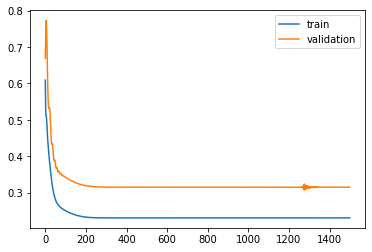

In [ ]:
epochs = 1500
train_losses = np.zeros(epochs)
valid_losses = np.zeros(epochs)

for i in range(epochs):
    
    model.train()
    
    predict = model.forward(x_train)

    loss = criterion(predict.squeeze(), y_train.squeeze())

    train_losses[i] = loss.data.numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//(epochs//5) == i/(epochs//5)):
        print("Epoch: ", i+1, " Loss: ", loss.item())
    
    #validation
    with torch.no_grad(): 
        model.eval()
        predict = model.forward(x_valid)        
        loss    = criterion(predict.squeeze(), y_valid.squeeze())
        valid_losses[i] = loss.data.numpy()

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='validation')
plt.legend()

**Результат обучения на примерах**

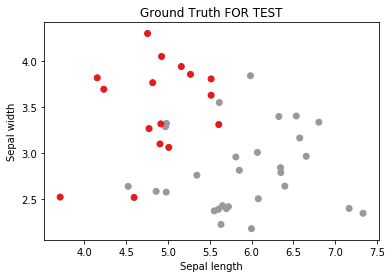

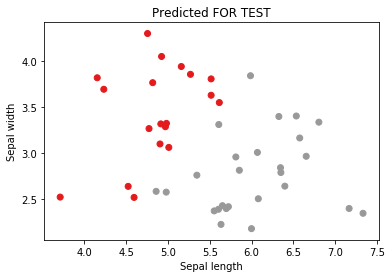

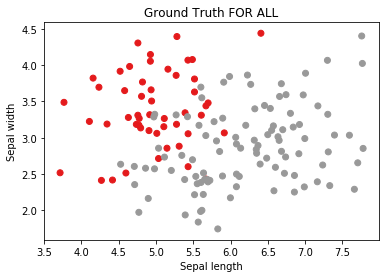

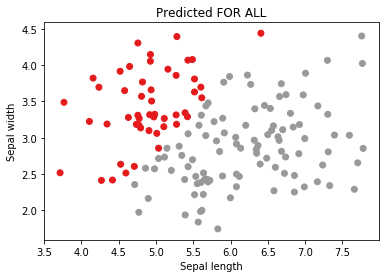

In [ ]:
model.eval()

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=torch.squeeze(y_test), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')
plt.show()

predict = model.forward(x_test)

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR TEST')
plt.show()

predict = model.forward(torch.from_numpy(x.astype(np.float32)))

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(y)), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR ALL')
plt.show()

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=np.round(np.squeeze(predict.data.numpy())), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted FOR ALL')
plt.show()

#### Упражнение 1
Добавьте в процедуру обучения возможность ранней остановки по критериям неубывания (насыщение, возростание выше заданного порога) валидационной кривой на протяжении заданного числа шагов.

**Обучение на минибатчах**

Для начала создадим генератор минибатчей для тренировки и валидации.

Есть несколько способов создания генераторов, мы воспользуемся следующим.
Для начала создадим класс подготовки данных.

In [ ]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
class PrepareData(Dataset):

    def __init__(self, x, y):
        if not torch.is_tensor(x):
            self.x = torch.from_numpy(x)
        else:
            self.x = x
            
        if not torch.is_tensor(y):
            self.y = torch.from_numpy(y).type(torch.float)
        else:
            self.y = y  

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [ ]:
print(x_train.shape)
print(x_valid.shape)

torch.Size([73, 2])
torch.Size([32, 2])


In [ ]:
BATCH_SIZE_TRAIN = 32
BATCH_SIZE_VALID = 16

ds = PrepareData(x=x_train, y=y_train)
train_loader = DataLoader(ds, batch_size=BATCH_SIZE_TRAIN, shuffle=True)

ds = PrepareData(x=x_valid, y=y_valid)
valid_loader = DataLoader(ds, batch_size=BATCH_SIZE_VALID, shuffle=True)

Каждый вызов генератора ```train_loader``` это 32 (BATCH_SIZE) случайных значений x и y

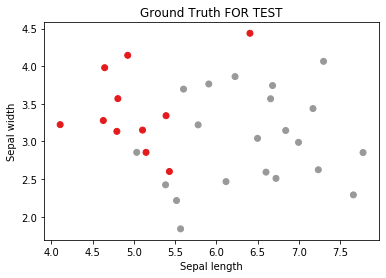

In [ ]:
batch_number = 0
x_batch,y_batch = list(train_loader)[batch_number]
# Plot also the training points
plt.scatter(x_batch[:, 0], x_batch[:, 1], c=torch.squeeze(y_batch), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')
plt.show()

* Примечание:
1. Можно также создать генератор как ```train_dataset =  TensorDataset(x_train, y_train)```
2. Более правильная работа с генераторами чем ```list(train_loader)[batch_number]``` - это обращение к элементами при помощи специальных команд ```iter``` и ```next```

```python
    dataiter = iter(train_loader)
    x_batch,y_batch = dataiter.next()
```

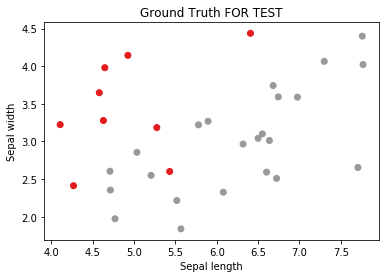

In [ ]:
ds = TensorDataset(x_train, y_train)
train_loader = DataLoader(ds, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
dataiter = iter(train_loader)
x_batch,y_batch = dataiter.next()
plt.scatter(x_batch[:, 0], x_batch[:, 1], c=torch.squeeze(y_batch), cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Ground Truth FOR TEST')
plt.show()

* При работе с генераторами в цикле ```for``` иттерирование и операция ```next``` будут производится автоматически

**Обучение**

Epoch:  1  Loss:  0.8264367580413818
Epoch:  301  Loss:  0.1500718891620636
Epoch:  601  Loss:  0.07611019164323807
Epoch:  901  Loss:  0.09237483143806458
Epoch:  1201  Loss:  0.12739479541778564


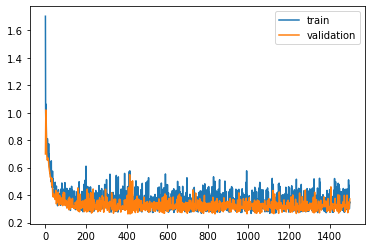

In [ ]:
HIDDEN    = 30
LR        = 0.01
epochs    = 1500

model     = FeedForward(x.shape[1], HIDDEN, n_classes = np.max(y))
criterion = torch.nn.BCELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

train_losses = np.zeros(epochs)
valid_losses = np.zeros(epochs)

for i in range(epochs):
    
    model.train()
    
    batch_loss = 0
    
    for n_batch, (x_batch, y_batch) in enumerate(train_loader):
    
        optimizer.zero_grad()
        
        predict = model.forward(x_batch)

        loss = criterion(predict.squeeze(), y_batch.squeeze())        

        loss.backward()

        optimizer.step()
        
        batch_loss += loss.data.numpy()       

    train_losses[i] = batch_loss/n_batch
        
    if(i//(epochs//5) == i/(epochs//5)):
        print("Epoch: ", i+1, " Loss: ", loss.item())

    
    #validation
    with torch.no_grad(): 
        model.eval()
        predict = model.forward(x_valid)        
        loss    = criterion(predict.squeeze(), y_valid.squeeze())
        valid_losses[i] = loss.data.numpy()

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='validation')
plt.legend()


#### Упражнение 1
Проведите процесс обучения с разным размером минибатча, сравните результаты.

#### Упрожнрение 2 
Добавьте работу с минибатчами в процессе валидации


<details>
<summary></summary>
```python
    
       model.eval()
        
        valid_loss = 0
        
        for n_batch, (x_batch, y_batch) in enumerate(valid_loader):
            
            predict = model.forward(x_batch)        
            loss    = criterion(predict.squeeze(), y_batch.squeeze())
            valid_loss += loss.data.numpy()
        
        valid_losses[i] = valid_loss/n_batch
```

---